# Исследование объявлений о продаже квартир

Имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 
<br>
<br>Задача — установить параметры для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 
<br>
<br>По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открыли файл с данными и изучили общую информацию. 

In [ ]:
#импортировали библиотеку и считали данные из csv-файла в датафрейм
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
#вывели первые 10 строк на экран для ознакомления с данными
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
#вывели основную информацию о датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
 #привели название столбца к корректному виду (snake_case)
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

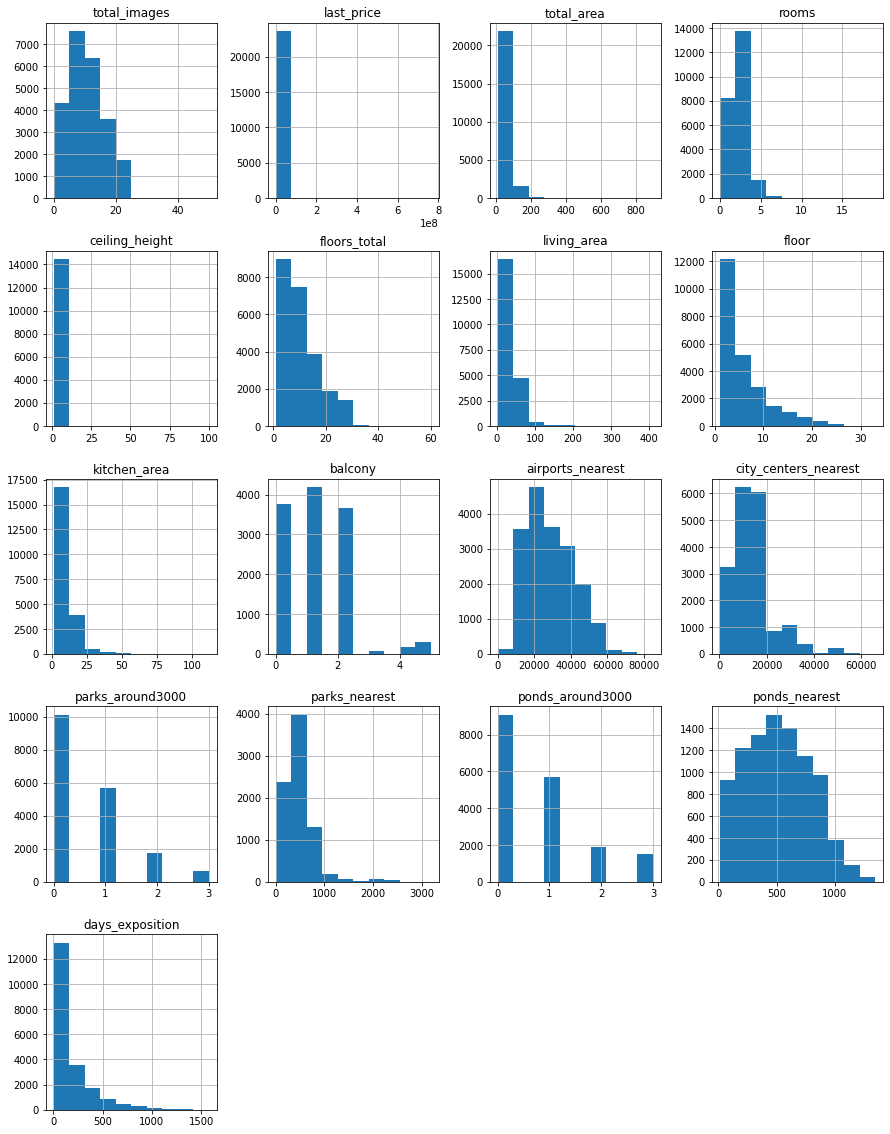

In [ ]:
#построили общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20));

### Предобработка данных

#### Определим и изучим пропущенные значения в столбцах

In [ ]:
#вывели пропуски (количественные данные) 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
#вывели пропуски (относительные данные) 
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Датафрейм имеет большое количество пропусков. Постараемся заполнить те, которые возможно.

##### **Заполняем пропуски в столбце is_apartment**

In [ ]:
#определили уникальное количество значений и количество их упоминаний
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Юридически, апартаменты являются нежилой недвижимостью и имеют существенные недостатки пред жилой недвижимостью. Данный юридический статус является важным с точки зрения покупателя, поэтому, предположительно, данные о том, что объект является апартаментами должен указываться. Если данные не указаны, вероятнее всего, объект не является апартаментами. Вероятно, пропуски появились из-за того, что данное поле является необязательным при размещении объекта в сервисе.

Присваиваем пропускам значение False, т.к., с высокой вероятностью помещения с пропуском в столбце is_apartment не являются аппартаментами. Указываем верный тип данных у столбца - bool, т.к., помещение либо является аппартаментами, либо нет.

In [ ]:
#присваиваем пропускам значение False и изменили тип данных
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype({'is_apartment':'bool'})

##### **Заполняем пропуски в столбце balcony**

In [ ]:
#определили уникальное количество значений и количество их упоминаний
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Балкон может быть фактором, влияющим на выбор квартиры. Если данные не указаны, вероятнее всего, объект не имеет балкона. Вероятно, пропуски появились из-за того, что данное поле является необязательным при размещении объекта в сервисе.
Присвоим пропускам занчение 0. Данные о количестве балконов имеют формат 1.0, что неверно - балкон либо есть, либо его нет. Поэтому дробных значений быть не может

In [ ]:
#присвоили пропускам занчение 0 и изменили тип данных
data['balcony'] = data['balcony'].fillna(0).astype({'balcony': 'Int64'})

##### **Заполняем пропуски в столбце locality_name**

В данном столбце всего 49 пропусков. В данном случае их проще удалить - это не помешает выполнить поставленную цель проекта. Причины, по которым нет данных о названии населенного пункта не ясна - это поле не может быть необязательным при заполнении данных по объекту. Предполагаю, что техническая ошибка.

In [ ]:
#заполняем пустые строки объектами, чтобы можно было их удалить
data['locality_name'].replace('', np.nan, inplace=True)
#удаляем строки с пропусками в locality_name
data.dropna(subset=['locality_name'], inplace=True)

##### **Заполняем пропуски в столбце floors_total**

Можно было бы предположить, что этажность дома совпадает с этажностью квартиры. Но смысл не указывать общую этажность дома есть только в том случае, если объект на ходится на первом этаже одноэтажного дома. Выведем на экран строки с пропусками в floors_total, чтобы определить верность нашего предположения 

In [ ]:
#изменили тип данных ,так как этажи могут быть только целыми числами
data['floors_total'] = data['floors_total'].astype({'floors_total': 'Int64'})
#создали датафрейм, в котором отсутствует информация floors_total
floors_total_null = data[data['floors_total'].isnull()] 
#вывели первые 5 значений получившегося датафрейма для анализа 
floors_total_null.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,<NA>,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,<NA>,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,<NA>,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,<NA>,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,<NA>,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Получается, что этажность дома не указана по неизвестным причинам. Предположительно, floors_total может быть необязательным полем при заполнении данных об объекте. Но так же необходимо проверить вероятность технических ошибок, так как количество пропусков небольшое: этаж может влиять на стоимость недвижимости, поэтому пользователи должны заполнить его.
Нам необходимо будет создать столбец с данными по типу этажа квартиры. Нехватка этих данных будет мешать. Так как не хватает данных по этажности дома всего у 86 строк, удалим их - это не навредит данным. Можно было бы оставить объекты на первых этажах, так как ясен тип этажа, но, повторюсь так как общее количество пропусков всего 86 строк, можно удалить все 86.

In [ ]:
#заполняем пустые строки объектами, чтобы можно было их удалить
data['floors_total'].replace('', np.nan, inplace=True)
#удаляем строки с пропусками в floors_total
data.dropna(subset=['floors_total'], inplace=True)

##### **Заполняем пропуски в столбце living_area**

Пропуски будем заполнять с помощью коэффициента соотношения площадей. Пропуски могли появиться из-за того, что данное поле является необзательным - пользователи не указывают при создании объекта эти данные. 

In [ ]:
#создаем датафрейм с пропущенными в living_area
df_living_area_null = data[data['living_area'].isnull()] 
#в созданном датафрейме находим среднее total_area, где есть пропуски в living_area и округляем до сотых
total_area_mean = round(df_living_area_null['total_area'].mean(), 2) 

#создаем датафрейм с пропущенными без пропусков в living_area
df_living_area_notnull = data.loc[data['living_area'] > 0] 
#в созданном датафрейме находим среднее living_area, где нет пропусков в living_area и округляем до сотых
living_area_mean = round(df_living_area_notnull['living_area'].mean(), 2) 

#находим коэффициент
ratio_for_living_area = round(total_area_mean / living_area_mean, 2) 
#заполняем пропуски в living_area с помощью коэффициента
data['living_area'] = data['living_area'].fillna(data['total_area'] / ratio_for_living_area) 

##### **Заполняем пропуски в столбце kitchen_area**

Пропуски будем заполнять с помощью коэффициента соотношения площадей, как со столбцом living_area. Пропуски могли появиться из-за того, что данное поле является необзательным - пользователи не уазывают данные, если это разрешено при создании объекта. 

In [ ]:
df_kitchen_area_null = data[data['kitchen_area'].isnull()] 
total_area_mean_kitchen_area_null = round(df_kitchen_area_null['total_area'].mean(), 2) 

df_kitchen_area_notnull = data.loc[data['kitchen_area'] > 0]
kitchen_area_mean = round(df_kitchen_area_notnull['kitchen_area'].mean(), 2) 

ratio_for_kitchen_area = round(total_area_mean_kitchen_area_null / kitchen_area_mean, 2) 

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / ratio_for_kitchen_area)

##### **Заполняем пропуски в столбце ceiling_height**

Высота потолков может быть не обязательным полем при заполнении данных об объекте. Это может объяснить, почему так много пропусков в этом столбце. Изучим строки с пропусками с столбце ceiling_height

In [ ]:
#создадим датафрейм с пропусками в столбце ceiling_height
ceiling_height_null = data[data['ceiling_height'].isnull()] 
#изучим, в каких населенных пунктах больше всего пропусков
ceiling_height_null['locality_name'].value_counts() 

Санкт-Петербург                        5555
посёлок Мурино                          320
посёлок Шушары                          223
посёлок Парголово                       190
деревня Кудрово                         177
                                       ... 
посёлок Пансионат Зелёный Бор             1
поселок городского типа Красный Бор       1
посёлок Лисий Нос                         1
городской посёлок Виллози                 1
посёлок городского типа Красный Бор       1
Name: locality_name, Length: 283, dtype: int64

Как оказалось, больше всего пропусков у Санкт-Петербурга. Предположительно, в Санкт-Петербурге в центре (Старые постройки) потолки выше. Поэтому пропуски в высоте потолков в Санкт-Петербурге будем заполнять в зависимости от расстояния объекта от центра города.
Но пока заполним пропуски по другим населенным пунктом средним значением высоты потолков, за исключением Санкт-Петербурга.

In [ ]:
#находим среднее значение высоты потолков у объектов из всех населенных пунктов, кроме СПб
ceiling_height_notnull_notspb = data.loc[(data['ceiling_height'] > 0) & (data['locality_name'] != 'Санкт-Петербург')]
ceiling_height_notspb = round(ceiling_height_notnull_notspb['ceiling_height'].mean(), 2)

#выводим на экран получившееся значение
display(ceiling_height_notspb)
#заполняем пропуски полученными данными
data.loc[(data['ceiling_height'].isnull()) & (data['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'] = ceiling_height_notspb

2.7

В итоге получаем число, близкое к реальности: 2.7 м. - это очень близко к стандарту

Теперь заполняем пропуски ceiling_height у Санкт-Петербурга. Заполним средним значением.
Для старой части города посчитаем среднее в радиусе 5 км. от центра города. Судя по карте, этот район точно является старой частью города.

In [ ]:
#создаем датафрейм с данными по объектам из Санкт-Петербурга в радиусе 5000 м от центра
ceiling_height_notnull_spb_5000 = data.loc[
    (data['ceiling_height'] > 0) & (data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] <= 5000) & (data['city_centers_nearest'] > 0)
] 
#находим среднее
ceiling_height_spb_5000_mean = round(ceiling_height_notnull_spb_5000['ceiling_height'].mean(), 2) 

#выводим полученные данные на экран
display(ceiling_height_spb_5000_mean) 
#заполняем пропуски
data.loc[(data['ceiling_height'].isnull()) & (data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] <= 5000), 'ceiling_height'] = ceiling_height_spb_5000_mean

3.2

Теперь заполняем пропуски ceiling_height у Санкт-Петербурга у объектов далее 5 км. от центра города.

In [ ]:
#создаем датафрейм с данными по объектам из Санкт-Петербурга далее 5000 м от центра
ceiling_height_notnull_spb_5001 = data.loc[
    (data['ceiling_height'] > 0) & (
        data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] > 5000) & (
        data['city_centers_nearest'] > 0)
] 
#находим среднее
ceiling_height_spb_5001_mean = round(ceiling_height_notnull_spb_5001['ceiling_height'].mean(), 2) 

#выводим полученные данные на экран
display(ceiling_height_spb_5001_mean)
#заполняем пропуски
data.loc[(data['ceiling_height'].isnull()) & (data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] > 5000), 'ceiling_height'] = ceiling_height_spb_5001_mean

2.74

In [ ]:
#необходимо исследовать объекты, у которых не получилось заполнить пропуски
ceiling_height_null_nan = data[data['ceiling_height'].isnull()] 
display(ceiling_height_null_nan)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10,36.956522,6,False,...,12.686567,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,NaN,9,84.000000,8,False,...,30.037313,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
1872,13,3100000.0,32.00,2019-03-15T00:00:00,1,NaN,4,19.000000,2,False,...,5.000000,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1895,12,9500000.0,130.00,2019-03-27T00:00:00,5,NaN,5,90.000000,2,False,...,15.000000,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2364,17,4300000.0,32.60,2019-04-28T00:00:00,1,NaN,25,14.300000,17,False,...,8.100000,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,6,28099500.0,174.00,2018-12-19T00:00:00,3,NaN,10,94.565217,7,False,...,32.462687,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,9,10912400.0,68.00,2018-12-19T00:00:00,1,NaN,10,36.956522,5,False,...,12.686567,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4323,5,25476800.0,160.00,2018-12-19T00:00:00,2,NaN,10,86.956522,5,False,...,29.850746,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5908,7,11170500.0,68.00,2018-12-19T00:00:00,1,NaN,10,36.956522,9,False,...,12.686567,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7272,3,3390000.0,24.64,2019-04-22T00:00:00,1,NaN,12,18.000000,3,False,...,4.597015,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


У 29 объектов не удалось заполнить высоту потолков, так как неизвестно, в какой части города находится здание. Одна из задач звучит так: "посчитано и добавлено в таблицу: расстояние в км до центра города". Так как объектов немного, удалим их. Это не должно повредить расчетам. 

In [ ]:
#заполняем пустые строки объектами, чтобы можно было их удалить
data['ceiling_height'].replace('', np.nan, inplace=True) 
#удаляем
data.dropna(subset=['ceiling_height'], inplace=True)

##### **Пропуски, которые мы не можем заполнить по объективным причинам**

Список столбцов:
airports_nearest         
cityCenters_nearest      
parks_around3000         
parks_nearest           
ponds_around3000         
ponds_nearest           
days_exposition 

Все данные, кроме days_exposition, берутся с картографических сервисов. Если этих данных нет, вероятнее всего, произошла техническая ошибка. days_exposition так же должно рассчитываться автоматически на основе данных, которые есть у Яндекс Недвижимости. 

Для корректного заполнения пропусков недостаточно данных.

#### Ищем явные дубликаты

In [ ]:
display(data[data.duplicated()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Явных дубликатов не обнаружено.

#### Изменение типов данных

В некоторых ячейках мы меняли тип данных при заполнении пропусков. Выведем еще раз информацию и проверим, нужно ли менять тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23536 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23536 non-null  int64  
 1   last_price            23536 non-null  float64
 2   total_area            23536 non-null  float64
 3   first_day_exposition  23536 non-null  object 
 4   rooms                 23536 non-null  int64  
 5   ceiling_height        23536 non-null  float64
 6   floors_total          23536 non-null  Int64  
 7   living_area           23536 non-null  float64
 8   floor                 23536 non-null  int64  
 9   is_apartment          23536 non-null  bool   
 10  studio                23536 non-null  bool   
 11  open_plan             23536 non-null  bool   
 12  kitchen_area          23536 non-null  float64
 13  balcony               23536 non-null  Int64  
 14  locality_name         23536 non-null  object 
 15  airports_nearest   

Две колонки выделяются:
- days_exposition: количество дней измеряется целыми числами, поэтому необходимо изменить тип данных на int;
- first_day_exposition: дату лучше преобразовать в datetime

In [ ]:
#изменили тип данных days_exposition
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
#изменили тип данных first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

####  Устраняем неявные дубликаты в названиях населённых пунктов

Выведем уникальные значения столбца locality_name для ознакомления с данными.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
#удалим из названий тип населенного пункта, чтобы исключить неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ', '').str.replace(
    'посёлок ', '').str.replace('деревня ', '').str.replace('поселок городского типа ', '').str.replace(
    ' городского типа ', '').str.replace('садовое товарищество ', '').str.replace(
    'поселок ', '').str.replace('городской  ', '').str.replace('село ', '').str.replace(
    'имени ', '').str.replace('садоводческое некоммерческое товарищество ', '').str.replace(
    'при железнодорожной станции ', '').str.replace('коттеджный  ', '').str.replace(
    ' станции ', '').str.replace('городского типа Лебяжье', 'Лебяжье').str.replace(
    'городского типа Сиверский', 'Сиверский').str.replace('городского типа КрасныйБор', 'Красный Бор').str.replace(
    'городского типа ', '').str.replace('коттеджный', '').str.replace('городской ', '').str.replace('станции ', '')

####  Устраняем аномалии в столбцах

##### **Поиск аномалий в столбце rooms**

Узнаем распределение количества комнат.

In [ ]:
#определили уникальное количество значений и количество их упоминаний
data['rooms'].value_counts()

1     7990
2     7889
3     5775
4     1172
5      323
0      194
6      103
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Что выделяется:
- 194 объекта с 0 комнат (такого быть не может)
- 90 квартир с 7 и более комнатами (очень много комнат - выбивающееся значение). Искал на агрегатора хнедвижимости многокомнатные квартиры в СПб - редко встречаются варианты с больше чем 7-ю комнатами.

90 квартир с 7 и более комнатами удалим. Это не должно повредить данным.
0 комнат быть не может. возможно, ошибка. Необходимо проверить количество студий чтобы проверить связь количества объектов с 0 комнат и количество студий. 

In [ ]:
#удаляем строки, в которых количество комнат больше 7-ми
data = data.drop(data[data.rooms > 7].index)
 
data['studio'].value_counts() 

False    23359
True       146
Name: studio, dtype: int64

Видим, что есть 146 студий. можно предположить, что вместо 0 можно написать 1 комнату.

In [ ]:
#проверили площадь квартир, у которых 0 комнат
nool_rooms = data.loc[data['rooms'] == 0] 
#сумма и площадь указывают на то, что кварттиры с 0 комнат могут быть студиями - изменим 0 на 1
display(nool_rooms.head(60)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.70,24,15.500000,2,False,...,5.037313,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
349,4,2320000.0,25.00,2017-09-27,0,2.70,14,17.000000,1,False,...,4.664179,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45
440,8,2480000.0,27.11,2018-03-12,0,2.74,17,24.750000,4,False,...,5.057836,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
508,0,3375000.0,34.40,2017-03-28,0,2.70,26,24.300000,19,False,...,6.417910,1,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430
608,2,1850000.0,25.00,2019-02-20,0,2.70,10,13.586957,7,False,...,4.664179,0,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.500000,21,False,...,4.496269,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.000000,1,False,...,3.171642,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40
780,9,2600000.0,26.10,2018-02-20,0,2.70,18,14.184783,8,False,...,4.869403,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.000000,3,False,...,6.529851,1,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7
946,5,2200000.0,23.00,2016-09-27,0,2.70,27,18.000000,7,False,...,4.291045,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483


In [ ]:
#изменили 0 на 1
data['rooms'] = data['rooms'].replace(0, 1)

##### **Поиск аномалий в столбце floors_total**

In [ ]:
#определили уникальное количество значений и количество их упоминаний
data['floors_total'].value_counts()

5     5761
9     3754
16    1375
12    1359
4     1188
10    1166
25    1070
6      901
17     833
3      666
7      586
14     553
18     505
24     460
8      384
2      379
15     365
23     349
19     338
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
52       1
29       1
33       1
37       1
Name: floors_total, dtype: Int64

Самый высокий жилой дом в СПб имеет 35 этажей. Поэтому удалим объекты, у которых более 35 этажей.

In [ ]:
#удаляем лишние данные
data = data.drop(data[data['floors_total'] > 35].index)

##### Поиск аномалий в столбце total_area 

Так как жилую площадь и площадь кухни мы заполняли по коэффициенту, могли быть расхождения. Найдем объекты, в которых сумма жилой площади и кухни больше общей площади квартиры. 

In [ ]:
#нашли объекты, у которых сумма жилой площади и кухни больше общей площади квартиры 
more_total_area = data.loc[(data['living_area'] + data['kitchen_area'])  > data['total_area']]
display(more_total_area)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,6.200000,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12
424,14,11500000.0,98.00,2016-05-10,3,2.65,3,88.00,3,False,...,18.283582,1,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90
440,8,2480000.0,27.11,2018-03-12,1,2.74,17,24.75,4,False,...,5.057836,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
545,9,4700000.0,23.80,2018-12-28,1,2.74,18,20.00,9,False,...,5.000000,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108
551,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,False,...,9.280000,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29,1,2.70,16,23.30,15,False,...,5.093284,1,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59
22907,9,65000000.0,228.00,2016-06-02,4,3.20,5,200.00,2,False,...,42.537313,0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,<NA>
23102,0,5800000.0,66.00,2017-06-09,5,2.74,5,55.50,1,False,...,12.313433,0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21
23191,3,1900000.0,18.90,2016-04-04,1,2.70,16,16.00,12,False,...,3.526119,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115


119 ячеек с неправдоподобными данными. Их лучше удалить.

In [ ]:
#удалили
data = data.drop(data[(data['living_area'] + data['kitchen_area'])  > data['total_area']].index)

Так же необходимо избавиться от выбросов.

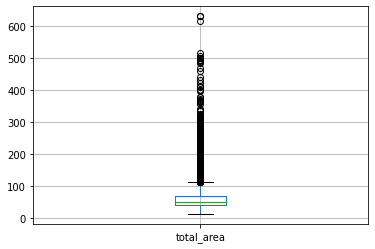

In [ ]:
#строим ящик с усами
data.boxplot(column='total_area')
plt.show()

In [ ]:
#удаляем выбросы
#находим полтора межквартильных расстояния
total_area_q = (data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25)) * 1.5
# удаляем данные больше значения суммы q75 и квартильного расстояния
data = data.drop(data[((data['total_area'].quantile(0.75) + total_area_q) < data['total_area'])].index)
# удаляем данные меньше значения разницы q25 и квартильного расстояния
data = data.drop(data[((data['total_area'].quantile(0.25) - total_area_q) > data['total_area'])].index)

#проверяем, что получилось
display(data['total_area'].describe())

count    22150.00000
mean        54.27487
std         19.18803
min         13.00000
25%         39.42000
50%         50.00000
75%         65.40000
max        113.60000
Name: total_area, dtype: float64

##### Поиск аномалий в столбце last_price

Для удобства работы, переведм стоимость объекта из руб. в тыс.руб.

In [ ]:
#переводим руб. в тыс. руб.
data['last_price'] = round(data['last_price'] / 1000, 2)

Теперь необходимо определить и устранить выбросы

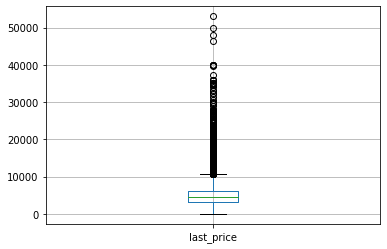

In [ ]:
data.boxplot(column='last_price')
plt.show()

In [ ]:
last_price_q = (data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25)) * 1.5
data = data.drop(data[((data['last_price'].quantile(0.75) + last_price_q) < data['last_price'])].index)
data = data.drop(data[((data['last_price'].quantile(0.25) - last_price_q) > data['last_price'])].index)
display(data['last_price'].describe())

count    20865.000000
mean      4697.282618
std       2035.129492
min         12.190000
25%       3300.000000
50%       4350.000000
75%       5850.000000
max      10700.000000
Name: last_price, dtype: float64

In [ ]:
#подозрительно низкая стоимость у объекта
display(data.query('last_price < 13')) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12.19,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8


Квартира в СПб с площадью 109 м2 не может стоить 12 000 руб. Можно было бы предложить, что реальная стоиомть 12 млн. Но наверняка мы этого не знаем, поэтому удалим эту строку.

In [ ]:
#удаляем неправдоподобные данные
data = data.drop(data[data['last_price'] < 13].index)
#проверяем данные
display(data['last_price'].describe())

count    20864.000000
mean      4697.507172
std       2034.919757
min        430.000000
25%       3300.000000
50%       4350.000000
75%       5850.000000
max      10700.000000
Name: last_price, dtype: float64

##### Поиск аномалий в столбце ceiling_height

In [ ]:
#вывели уникальные значения высот потолков, чтобы понять, сможем ли мы визуально определить аномалии
display(sorted(data['ceiling_height'].unique()))

[1.0,
 1.2,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.85,
 3.88,
 3.9,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.15,
 4.19,
 4.2,
 4.3,
 4.37,
 4.5,
 4.7,
 5.0,
 5.3,
 8.0,
 8.3,
 10.3,
 14.0,
 20.0,
 2

Замечаем две странности:
- есть потолки выше 10.3 м. (высота выше 10м выглядит очень неправдоподобно)
- есть потолки ниже 2-х метров (нельзя по стандартам)

По потолкам выше 10.3 м. (это 20, 22.6, 24 и пр.) можно было бы предположить, что присутствует ошибка в данных, совершенная пользователями - не там поставили точку. Это можно исправить делением на 10, что приведет высоту потолков к адекватным значениям (2.0, 2.3, 2.4 и пр.). 
Высота 14.0 выбивается, так как, мы не можем поделить на 10 - получится высота 1.4, что не соответствет стандарту. Поэтому, объекты с высотой потолков 14.0 м. удалим.

In [ ]:
#делим на 10 значения потолков, которые >= 20
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height'] / 10 
data['ceiling_height'] = round(data['ceiling_height'], 1) 

#удаляем объекты с высотой потолков 14 м.
data = data.drop(data[data['ceiling_height'] == 14.0].index) 

#удалили объекты, высота потолков которых менее 2-х метров
data = data.drop(data[data['ceiling_height'] < 2.0].index)

##### Поиск аномалий в столбце floor

Проверим, есть ли объекты, в которых этаж, на котором находится объект, выше этажности здания, в котором объект находится

In [ ]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Предполагаем, что аномалий нет.

##### Поиск аномалий в столбце kitchen_area

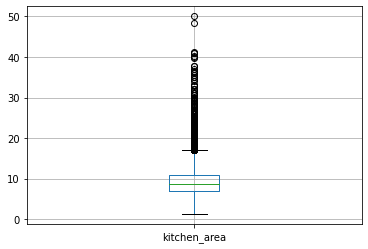

In [ ]:
#строим ящик с усами
data.boxplot(column='kitchen_area')
plt.show()

In [ ]:
# находим полтора межквартильных расстояния
kitchen_area_q = (data['kitchen_area'].quantile(0.75) - data['kitchen_area'].quantile(0.25)) * 1.5
# удаляем данные больше значения суммы q75 и квартильного расстояния
data = data.drop(data[((data['kitchen_area'].quantile(0.75) + kitchen_area_q) < data['kitchen_area'])].index)
# удаляем данные меньше значения разницы q25 и квартильного расстояния
data = data.drop(data[((data['kitchen_area'].quantile(0.25) - kitchen_area_q) > data['kitchen_area'])].index)

#проверяем данные
display(data['kitchen_area'].describe())

count    20216.000000
mean         8.997648
std          2.741867
min          1.300000
25%          7.000000
50%          8.600000
75%         10.792500
max         17.000000
Name: kitchen_area, dtype: float64

Минимальное значение - 1.3. Это подозрительно мало для площади кухни. В интернете не удалось найти информацию по кухням менее 4 м2. Выведем на экран объекты с площадью кухни меньше 4 м2.

In [ ]:
data.query('kitchen_area < 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,5,1500.0,17.0,2017-06-07,1,2.7,9,12.000000,1,False,...,3.171642,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40
906,15,2600.0,27.0,2017-07-10,1,2.8,23,18.000000,18,False,...,2.000000,0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10
1608,12,2150.0,20.1,2019-01-30,1,2.7,9,10.923913,1,True,...,3.750000,0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13
2165,15,3180.0,25.0,2019-03-21,1,2.5,25,17.000000,17,False,...,3.000000,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19
3078,17,6000.0,43.0,2018-11-12,2,2.9,4,29.300000,2,False,...,3.200000,0,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20217,7,4250.0,28.5,2019-05-01,1,2.8,14,19.500000,10,False,...,1.300000,0,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,<NA>
20714,7,1200.0,18.0,2018-01-04,1,2.7,4,9.782609,4,False,...,3.358209,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,45
21419,4,1870.0,20.0,2018-03-06,1,2.5,5,14.000000,1,False,...,2.000000,0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45
22356,6,2050.0,17.2,2019-01-13,1,2.8,23,9.347826,1,False,...,3.208955,0,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7


Мы видим 61 объект, в котором кухня менее 4-х м2. Кухни в 2-3 м2 выглядят нереалистичными. Удалим их из датасета.

In [ ]:
data = data.drop(data[data['kitchen_area'] < 4.0].index)

##### Поиск аномалий в столбце living_area

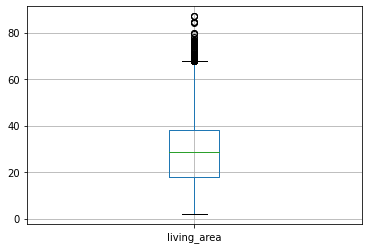

In [ ]:
data.boxplot(column='living_area')
plt.show()

In [ ]:
# находим полтора межквартильных расстояния
living_area_q = (data['living_area'].quantile(0.75) - data['living_area'].quantile(0.25)) * 1.5
# удаляем выбросы больше значения суммы q75 и квартильного расстояния
data = data.drop(data[((data['living_area'].quantile(0.75) + living_area_q) < data['living_area'])].index)
# удаляем выбросы меньше значения разницы q25 и квартильного расстояния
data = data.drop(data[((data['living_area'].quantile(0.25) - living_area_q) > data['living_area'])].index)

display(data['living_area'].describe())

count    20042.000000
mean        29.373692
std         11.722237
min          2.000000
25%         18.100000
50%         28.600000
75%         37.662283
max         67.800000
Name: living_area, dtype: float64

Минимальная жилая площадь в 2 м2 выглядит нереалистично. Эти данные заполняются пользователем, поэтому мы не можем точно сказать логику, которую использовал пользователь сайта при заполнении информации. Но оставить данные, в которых жилая площадь составляет 2 м2 тоже не можем. Минимальная площадь жилой комнаты (если точнее, спальни) по СНиП не может быть менее 8 м2. Поэтому удалим все объекты, у которых жилая площадь меньше 8 м2. 

In [ ]:
#определим количество объектов, которое удаляем
data.query('living_area < 8') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440.0,41.0,2017-07-02,1,2.7,17,3.0,17,False,...,11.000000,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216
13915,20,6350.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,...,9.000000,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91
16431,13,3799.0,31.0,2018-04-12,1,2.6,5,6.0,1,False,...,17.000000,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168
17582,11,2680.0,22.0,2018-08-11,1,2.7,25,5.0,8,False,...,4.104478,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70
21758,0,2330.0,23.0,2018-01-01,1,2.7,24,2.0,22,False,...,4.291045,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66
21943,15,6100.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,...,9.800000,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33


In [ ]:
#объектов немного, поэтому удаляем их
data = data.drop(data[data['living_area'] < 8.0].index)

####  Предположили причины появления пропусков и аномалий

Пропуски и аномалии могли появиться по следующим причинам:
- человеческий фактор. Пользователи не всегда заполняют необязательные поля (например, высоту потолков), могут неверно предоставить данные по некоторым категориям, например, высота потолка отличается в зависимости от комнаты (в подсобке и коридоре высота потолка может быть ниже) и пр. Для того, чтобы исключить человеческий фактор, необходимо предоставить инструкцию (как правильно измерить высоту потолков, что входит в жилую площадь и пр.). Делать все поля обязательными опасно - может снизиться конверсия в создание объекта на сайте. Как вариант, можно внедрить систему, при которой полнота заполнения профиля влияет на ранжирование. Т.е., чем полнее заполнен профиль, тем выше карточка объекта в каталоге сайта. Это может мотивировать пользователей к мксимально полному заполнению карточки объекта.
- технические ошибки. Могут возникнуть из-за неправильной логики работы сервиса или ошибок в работе сервиса. Например, пропуски в количестве дней размещения могут быть ошибкой, либо, эти объявления могут до сих пор висеть в продаже. Пропуски в расстоянии до ближайшего аэропорта может говорить о технической проблеме. А как быть, если аэропортов в городе несколько?!

### Посчитали и добавили в таблицу новые столбцы

####  Добавляем цену одного квадратного метра

In [ ]:
data['price_m2'] = round(data['last_price'] / data['total_area'], 2)

####  Добавляем день публикации объявления

In [ ]:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

#### Добавляем месяц публикации объявления

In [ ]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 

####  Добавляем год публикации объявления

In [ ]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

####  Добавляем тип этажа квартиры

In [ ]:
#пишем функцию, которая определяет, на каком этаже находитсяквартира: на первом, последнем или между ними
def floor_type(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем функцию
data['floor_type'] = data.apply(floor_type, axis=1)

####  Добавляем расстояние до центра в км

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

####  Изучение параметров объектов

##### Общая площадь

count    20036.000000
mean        51.285580
std         16.288107
min         20.000000
25%         38.477500
50%         47.800000
75%         61.470000
max        113.000000
Name: total_area, dtype: float64

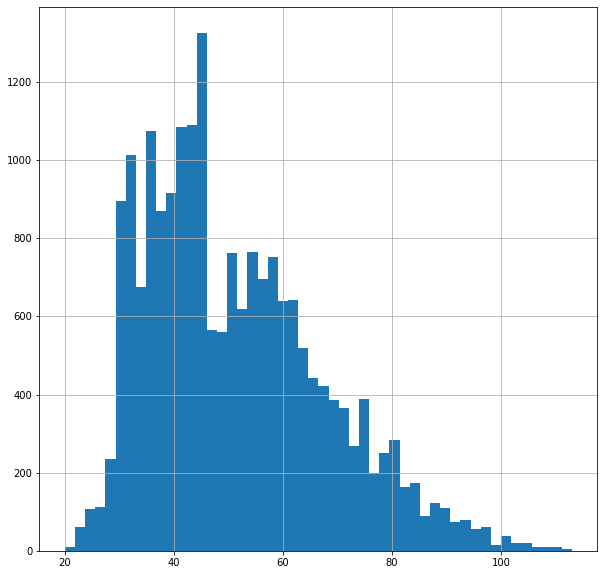

In [ ]:
data['total_area'].hist(bins=50, figsize=(10,10))
data['total_area'].describe()

- средняя общая площадь составляет около 51 м2
- большая часть квартир имеет общую площадь в диапазоне от 38 до 61 м2

##### Жилая площадь

count    20036.000000
mean        29.381320
std         11.715665
min          8.300000
25%         18.100000
50%         28.600000
75%         37.700000
max         67.800000
Name: living_area, dtype: float64

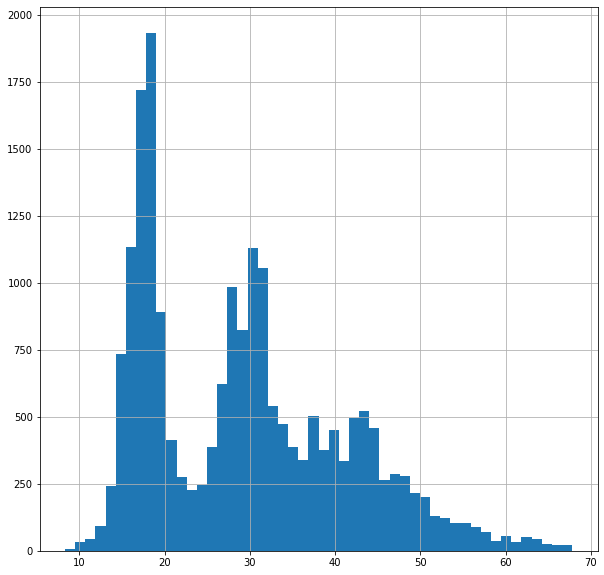

In [ ]:
data['living_area'].hist(bins=50, figsize=(10,10))
data['living_area'].describe()

Мощные пики, ориентировочно, в районе 15-20 м2 и 26-32 м2. Очень мало значений после 60 м2. 

##### Площадь кухни

count    20036.000000
mean         9.004956
std          2.723440
min          4.000000
25%          7.000000
50%          8.600000
75%         10.732500
max         17.000000
Name: kitchen_area, dtype: float64

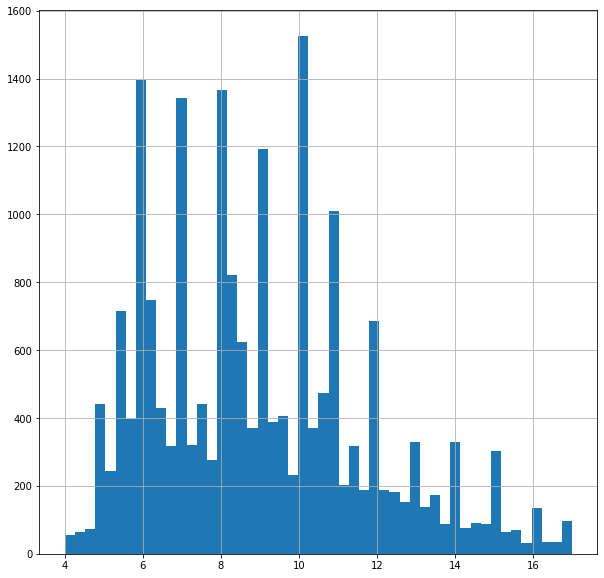

In [ ]:
data['kitchen_area'].hist(bins=50, figsize=(10,10))
data['kitchen_area'].describe()

Видим множество пиков. Вероятнее всего, это связано с тем, что есть популярные среди застроек площади кухонь. Меньше всего квартир площадью до 5 м2 и больше 12 м2 

##### Цена объекта

count    20036.000000
mean      4605.033519
std       1965.354682
min        430.000000
25%       3255.000000
50%       4300.000000
75%       5700.000000
max      10700.000000
Name: last_price, dtype: float64

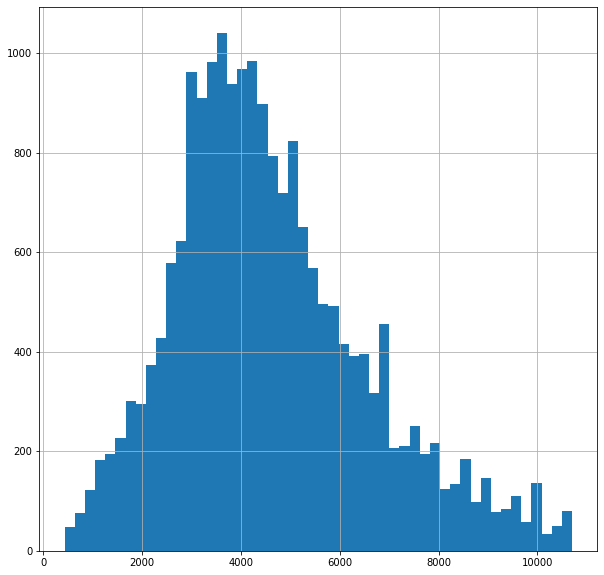

In [ ]:
data['last_price'].hist(bins=50, figsize=(10,10))
data['last_price'].describe()

Пик, ориентировочно, в промежутке между 3255 и 5000. руб. очень мало значений после 10 000 тыс. руб.

##### Количество комнат

count    20036.000000
mean         1.892843
std          0.852921
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

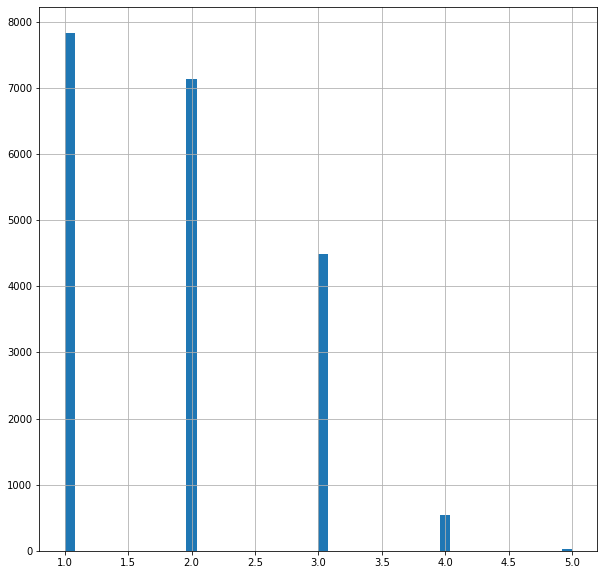

In [ ]:
data['rooms'].hist(bins=50, figsize=(10,10))
data['rooms'].describe()

Пики на 1-2 комнате. Очень мало объектов с 4-5 комнат. 

##### Высота потолков

count    20036.000000
mean         2.694530
std          0.203174
min          2.000000
25%          2.600000
50%          2.700000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

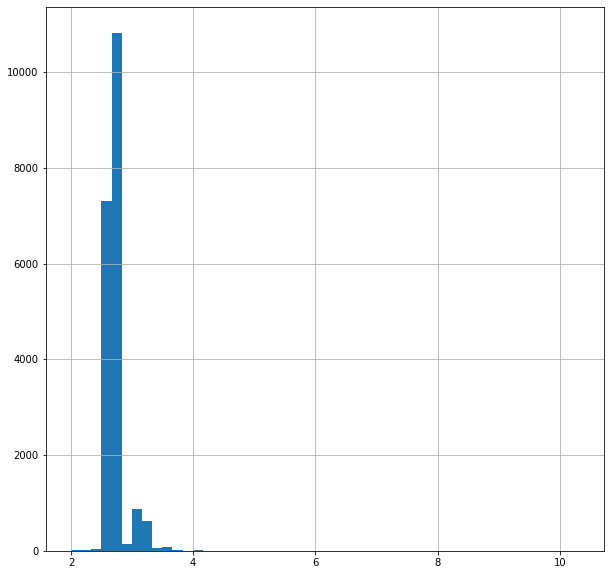

In [ ]:
data['ceiling_height'].hist(bins=50, figsize=(10,10))
data['ceiling_height'].describe()

Большая часть квартир имеет высоту потолка около 2.7 м. Остальных значений очень мало.

##### Этаж квартиры

count    20036.000000
mean         5.841585
std          4.848816
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

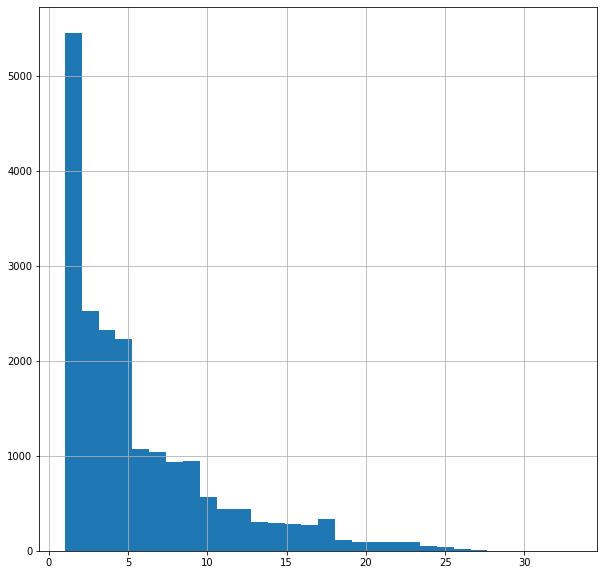

In [ ]:
data['floor'].hist(bins=30, figsize=(10,10))
data['floor'].describe()

Пик на 1-4 этаж. Оченьмало объектов на 20 и выше этаже.

##### Тип этажа квартиры

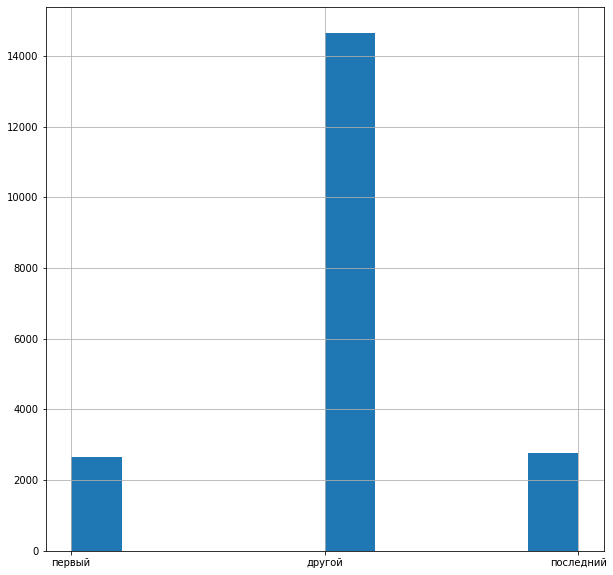

In [ ]:
data['floor_type'].hist(bins=10, figsize=(10,10));

Больше всего продается квартир между первым и последним этажами.

##### Общее количество этажей в доме

count    20036.000000
mean        10.710072
std          6.552938
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

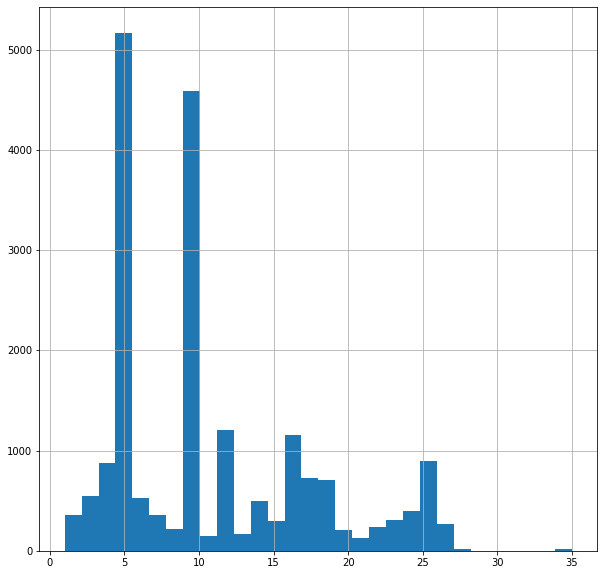

In [ ]:
data['floors_total'].hist(bins=30, figsize=(10,10))
data['floors_total'].describe()

Пик у 5 и 9 этажей. Это можно объяснить тем, что в советское время происходила массовая застройка 5-ю и 9-ю этажными домами (хрущевки и панельки). 

##### Расстояние до центра города в метрах

count    14813.000000
mean     15264.777560
std       8471.178475
min        208.000000
25%      10912.000000
50%      13816.000000
75%      16802.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

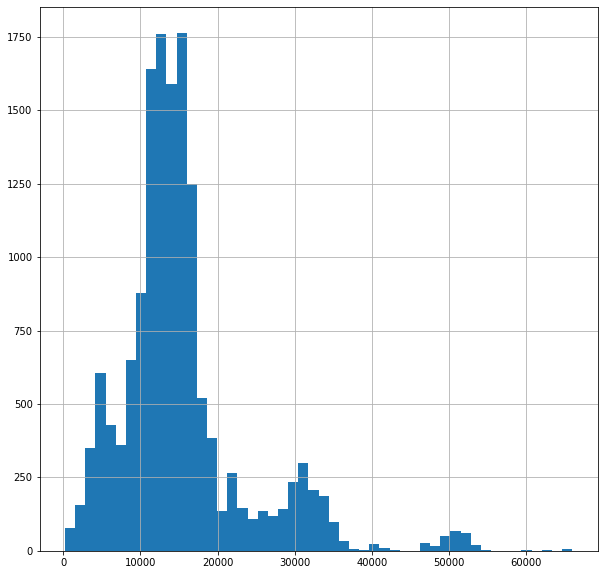

In [ ]:
data['city_centers_nearest'].hist(bins=50, figsize=(10,10))
data['city_centers_nearest'].describe()

Пики, ориентировочно, на 8-20 тыс. метров. Мало квартир, которые находятся далее, чем за 40 тыс.м. от центра. 

##### Расстояние до ближайшего аэропорта

count    14802.000000
mean     28988.233752
std      13114.072172
min          0.000000
25%      17839.250000
50%      27310.500000
75%      38035.750000
max      84869.000000
Name: airports_nearest, dtype: float64

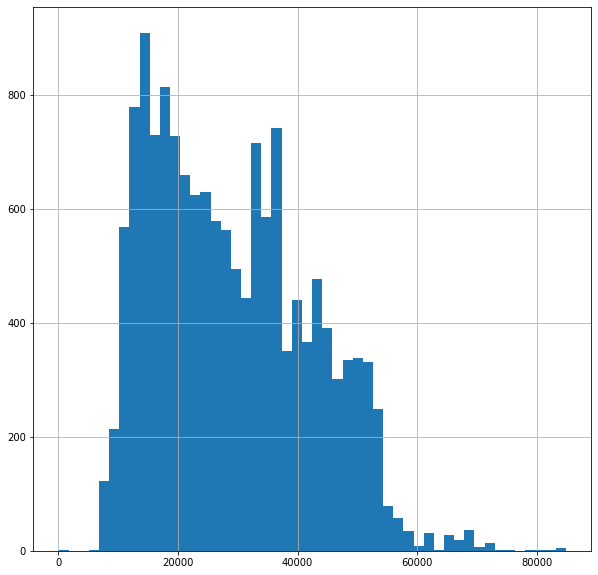

In [ ]:
data['airports_nearest'].hist(bins=50, figsize=(10,10))
data['airports_nearest'].describe()

Пик в районе 10 - 30 тыс. м. Меньше всего объектов, растояние до аэропорта у которых более 60 тыс. метров.

##### Расстояние до ближайшего парка

count    6058.000000
mean      487.792836
std       323.513795
min         1.000000
25%       291.250000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

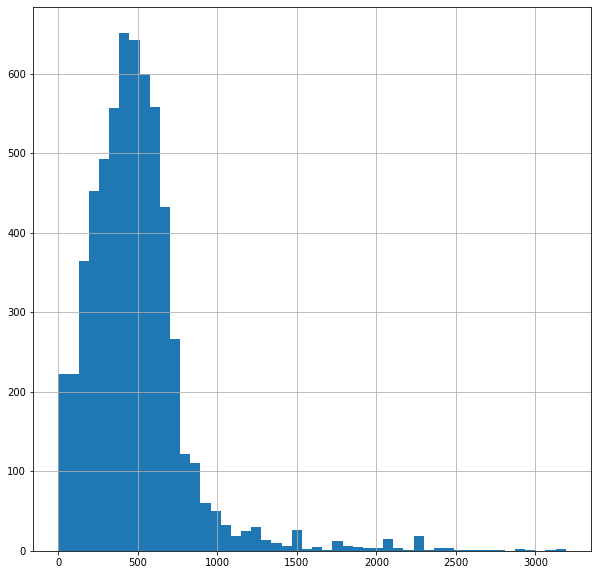

In [ ]:
data['parks_nearest'].hist(bins=50, figsize=(10,10))
data['parks_nearest'].describe()

Пик приходится на расстояние около 400 м. меньше всего объектов, где расстояние до парка более 1500 м.

##### День публикации объявления

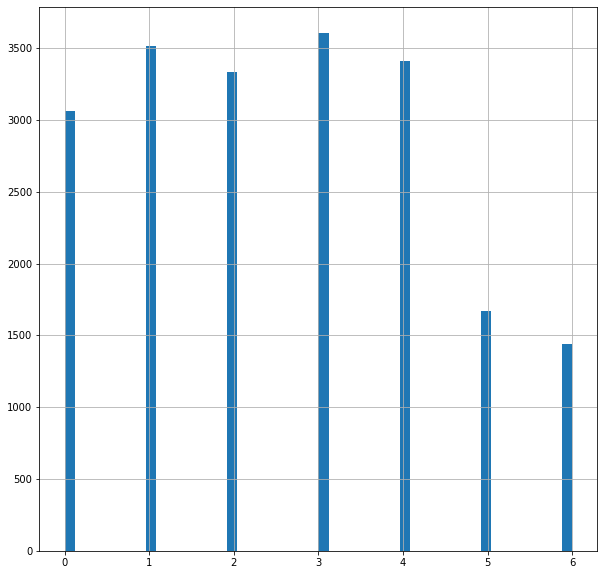

In [ ]:
data['day_exposition'].hist(bins=50, figsize=(10,10));

В сб и вс объявления размещают практически в два раза реже, чем в будни.

##### Месяц публикации объявления

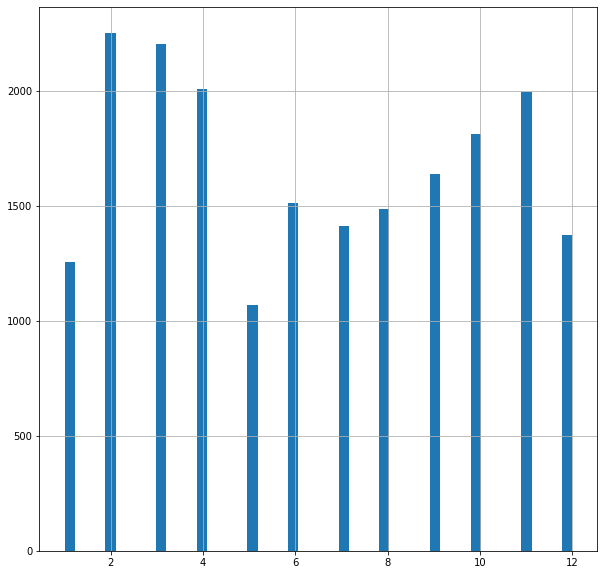

In [ ]:
data['month_exposition'].hist(bins=50, figsize=(10,10));

Больше объявлений о продаже квартир размещаются в феврале, марте, апреле и ноябре. Меньше всего в мае.

#### Как быстро продавались квартиры

count    17641.000000
mean       169.566861
std        207.119377
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

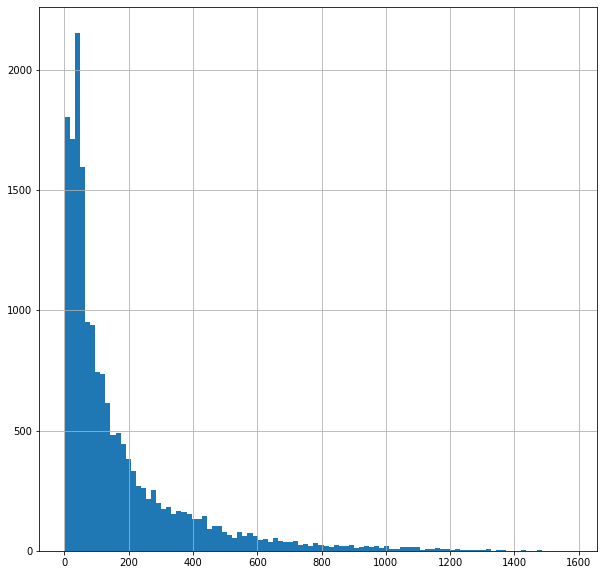

In [ ]:
data['days_exposition'].hist(bins=100, figsize=(10,10))
data['days_exposition'].describe()

В среднем, продажа квартиры занимает 169 дней. Медианное значение отличается - 90 дней. Самая быстрая продажа произошла за 1 день. Быстрыми рекомендую считать продажи, совершенные  в срок до 43 дней. Самая долгая продажа длилась 1580 дней. Долгими продажами рекомендую считать продажи, длящиеся дольше 215 дней. 

count    17641.000000
mean       169.566861
std        207.119377
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

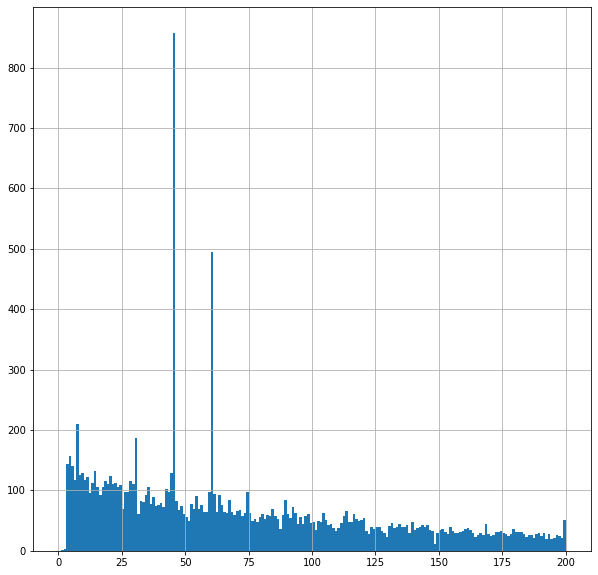

In [ ]:
#рассмотрим данные ближе
data['days_exposition'].hist(bins=200, figsize=(10,10), range=(0, 200)) 
data['days_exposition'].describe()

Видим две выделяющиеся аномалии. Необычно много продаж квартир, примерно, на 45 и 60 день.

In [ ]:
data.query('days_exposition == 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
78,9,4350.0,37.0,2018-02-22,1,2.7,19,18.000000,6,False,...,NaN,0.0,NaN,45,117.57,3,2,2018,другой,14.0
89,9,2500.0,63.0,2018-10-25,3,2.5,5,43.000000,4,False,...,NaN,NaN,NaN,45,39.68,3,10,2018,другой,NaN
153,12,4350.0,55.0,2017-05-21,2,2.6,9,31.200000,2,False,...,589.0,0.0,NaN,45,79.09,6,5,2017,другой,34.0
158,15,3100.0,47.3,2017-11-07,2,2.7,5,27.500000,2,False,...,NaN,NaN,NaN,45,65.54,1,11,2017,другой,NaN
166,0,2300.0,60.0,2017-12-02,2,2.7,3,32.608696,1,False,...,NaN,NaN,NaN,45,38.33,5,12,2017,первый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900.0,43.4,2018-01-11,2,2.7,5,23.586957,1,False,...,202.0,2.0,397.0,45,66.82,3,1,2018,первый,14.0
23613,4,3950.0,52.0,2018-03-04,3,2.7,5,28.260870,2,False,...,NaN,0.0,NaN,45,75.96,6,3,2018,другой,21.0
23670,9,2450.0,45.6,2018-02-08,1,2.8,9,24.782609,2,False,...,NaN,NaN,NaN,45,53.73,3,2,2018,другой,NaN
23679,0,2500.0,35.0,2017-12-08,1,2.7,9,19.021739,4,False,...,NaN,NaN,NaN,45,71.43,4,12,2017,другой,NaN


На первый взгляд данные разнородные. Но про наличие аномалии нужно указать. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил.

#### Определение факторов, которые больше всего влияют на стоимость квартиры

##### Влияние общей площади на общую стоимость квартиры

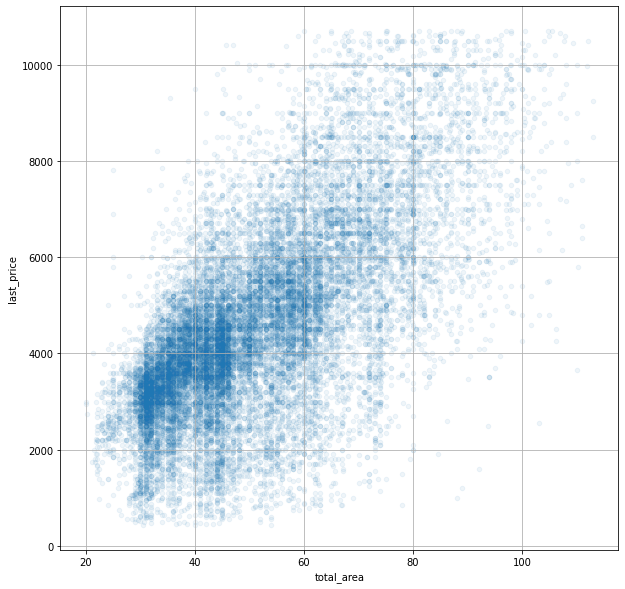

In [ ]:
#построили график для выявления закономерности
data.sort_values('total_area').plot(x='total_area', y='last_price', grid=True, figsize=(10, 10), kind='scatter', alpha=0.07); 

Можно отследить закономерность: чем больше общая площадь, тем выше стоимость. Однако, можно увидеть примерно одинаковые стоимости при разной площади, например, ориентировочно, у объектов с общими площадями 30 и 45-50 м2 похожие стоимость. Вероятно, это связано с тем, что объекты могут находиться в разных населенных пунктах, районах, с разным уровнем ремонта и пр. Проверим эту гипотезу на примере СПб.

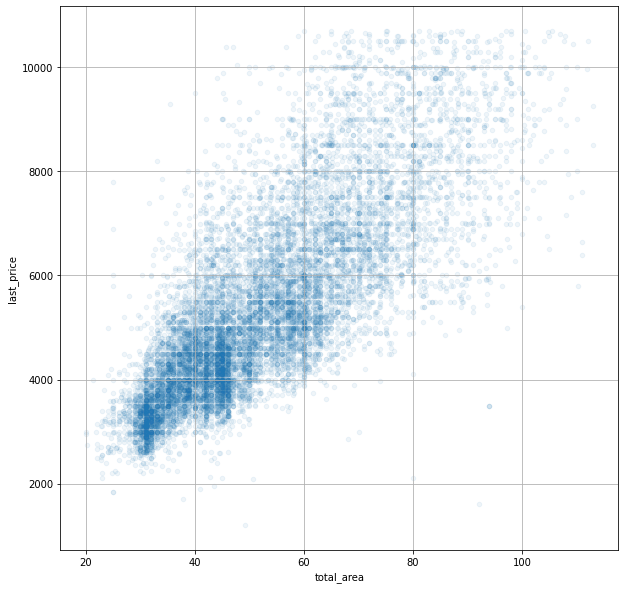

In [ ]:
#построили график для выявления закономерности в СПб
data.query('locality_name == "Санкт-Петербург"').sort_values('total_area').plot(
    x='total_area', y='last_price', grid=True, figsize=(10, 10), kind='scatter', alpha=0.07);

Как видим, график плавнее идет вверх. Вероятно, необходимо будет поделить населенные пункты на СПб и населенные пункты с разной степенью удаления, чтобы данные были четче. Проверим гипотезу.

In [ ]:
#изучили зависимость между общей площадью и стоимостью в СПб
data_spb_gipoteza = data.query('locality_name == "Санкт-Петербург"')
display(data_spb_gipoteza['total_area'].corr(data['last_price']))

0.7777215577279287

In [ ]:
#изучили зависимость между общей площадью и стоимостью у всего датасета
display(data['total_area'].corr(data['last_price'])) 

0.6587169725802491

Как мы видим, В отдельно взятом городе, а именно, СПб, зависимость выше, чем зависимость общего датасета. Это подтверждает тот факт, что необходимо делить населенные пункты на категории, которые влияют на стоимость, например, близость к СПб или другому крупному городу.
Вероятно, то же утверждение каснется и влияния на общую стоимость жилой площади и площади кухни и пр. Поэтоиу ниже не будем эти данные рассматривать, но в общем выводе отметим такую необходимость. Не будем рассматривать, так как нужно выработать четкую методологию распределения населенных пунктов по группам. Это не является нашей задачей по проекту.

##### Влияние жилой площади на общую стоимость квартиры

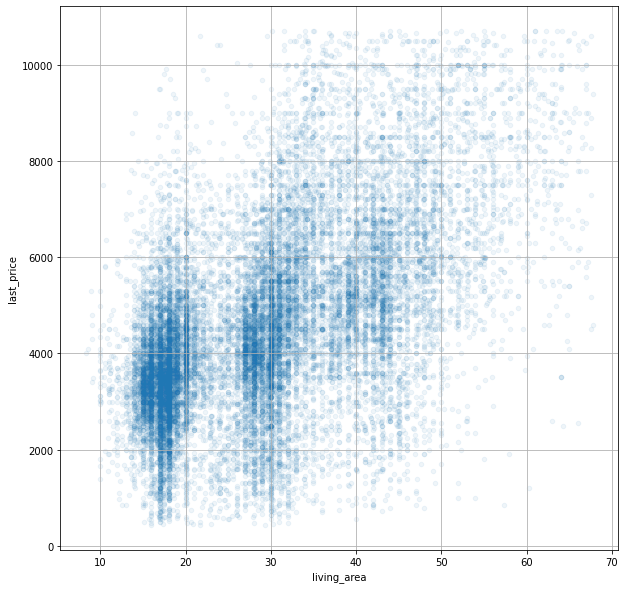

In [ ]:
data.sort_values('living_area').plot(x='living_area', y='last_price', grid=True, figsize=(10, 10), kind='scatter', alpha=0.07); 

Можно отследить закономерность: чем больше жилая площадь, тем выше стоимость. Однако, можно увидеть примерно одинаковые стоимости при разной жилой площади. Нужно выработать четкую методологию распределения населенных пунктов по группам, чтобы определить корректную корреляцию (об этом говорим в п.4.3.2)

In [ ]:
display(data['living_area'].corr(data['last_price']))

0.5453839691034181

##### Влияние площади кухни на общую стоимость квартиры

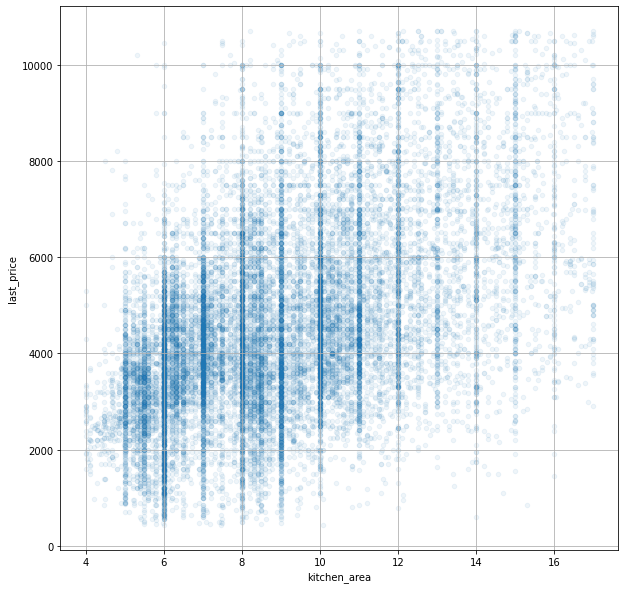

In [ ]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', grid=True, figsize=(10, 10), kind='scatter', alpha=0.07);

На графике видим наиболее популярные площади кухонь (6, 8 и пр. м2). Так же можно заметить, что с увеличением площади кухни увеличивается стоимость квартиры. Для определения точного коэффициента, нужно выработать четкую методологию распределения населенных пунктов по группам, чтобы определить корректную корреляцию (об этом говорим в п.4.3.2)

In [ ]:
display(data['kitchen_area'].corr(data['last_price']))

0.4762170904935123

##### Влияние количества комнат на общую стоимость квартиры

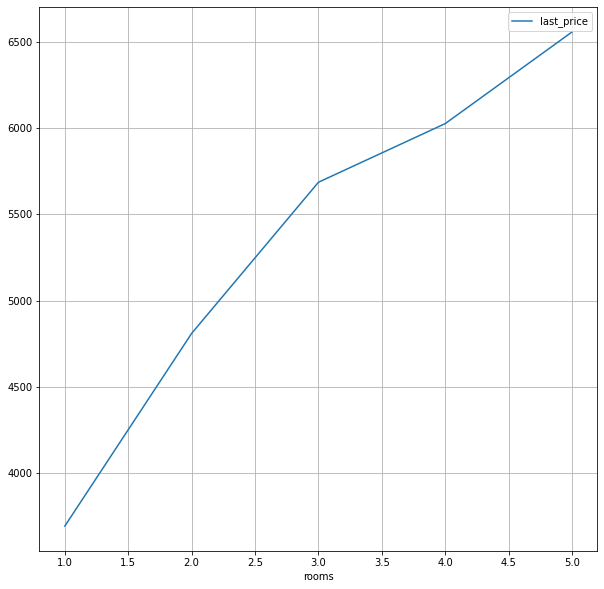

In [ ]:
 data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(10, 10));

График показывает, что чем больше комнат, тем дороже объект. Найдем коэффициент корреляции Пирсона для определения взаимосвязи одной величины от другой.

In [ ]:
display(data['rooms'].corr(data['last_price']))

0.4097508734753711

##### Влияние типа этажа на общую стоимость квартиры

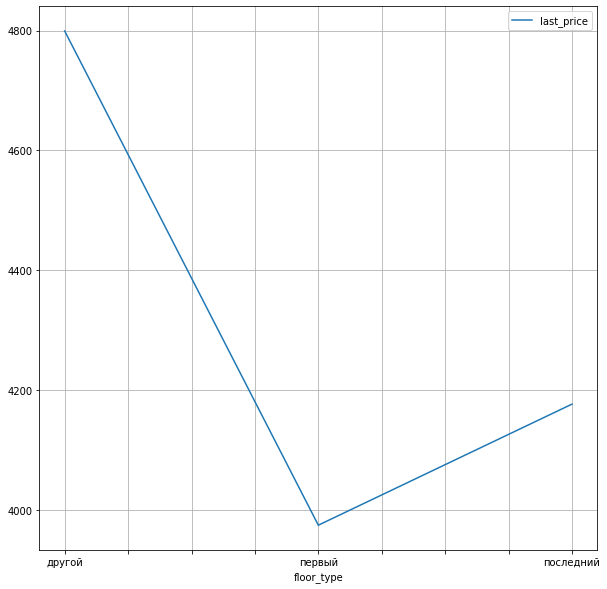

In [ ]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(10, 10));

График показывает, что квартры между первым и последним этажами дороже. Корреляцию Пирсона не сможем найти, так как значение ячеек имеет строковый тип. Но значение корреляции Пирсона нам важно. Дя того, чтобы его найти, заменим первый этаж на "1", последний этаж на "3", другой на "2".

0.023736279769723295

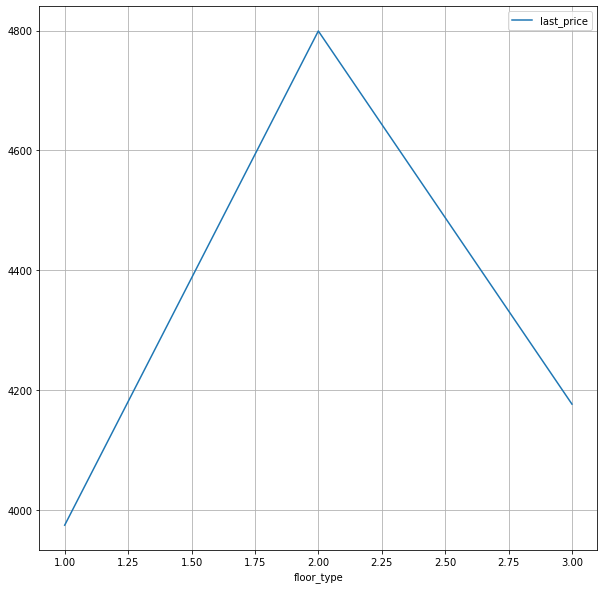

In [ ]:
#для определения корреляции, заменили первый этаж на "1", последний этаж на "3", другой на "2"
def floor_type_corr(df):
    if df['floor_type'] == 'первый':
        return 1
    elif df['floor_type'] == 'последний':
        return 3
    else:
        return 2
    
data['floor_type'] = data.apply(floor_type_corr, axis=1)

data.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(10, 10))
display(data['floor_type'].corr(data['last_price']))

##### Влияние дня недели при размещении на общую стоимость квартиры

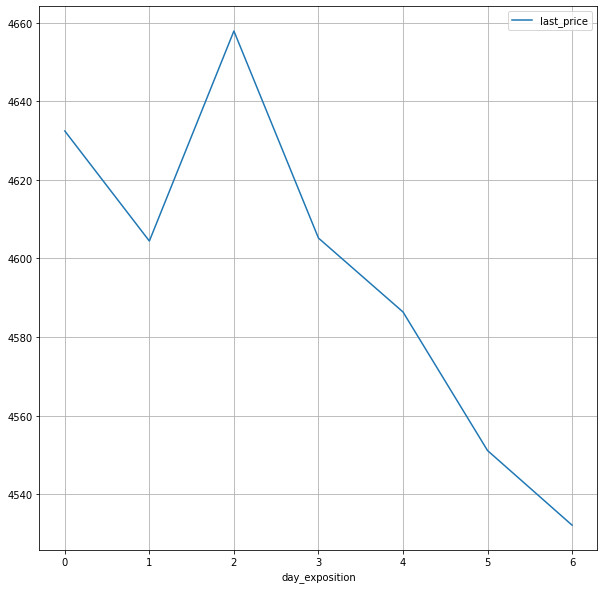

In [ ]:
data.pivot_table(index='day_exposition', values='last_price').plot(grid=True, figsize=(10, 10));

In [ ]:
display(data['day_exposition'].corr(data['last_price']))

-0.013915562329172144

##### Влияние месяца при размещения на общую стоимость квартиры

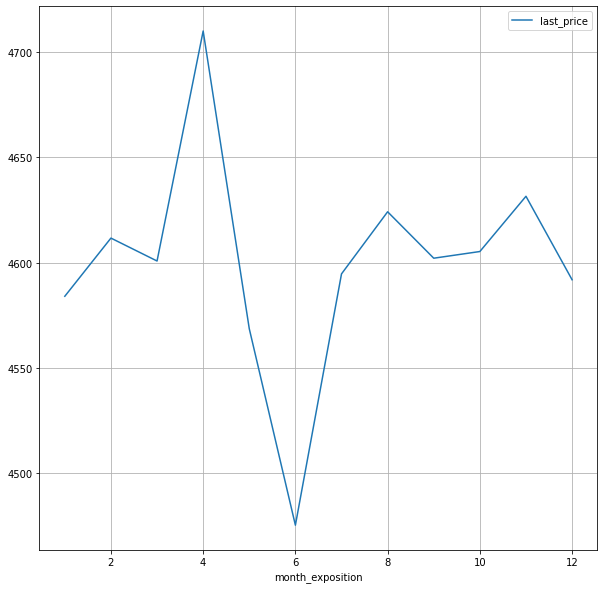

In [ ]:
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, figsize=(10, 10));

In [ ]:
display(data['month_exposition'].corr(data['last_price']))

-0.0007080759500284451

##### Влияние года при размещении  на общую стоимость квартиры

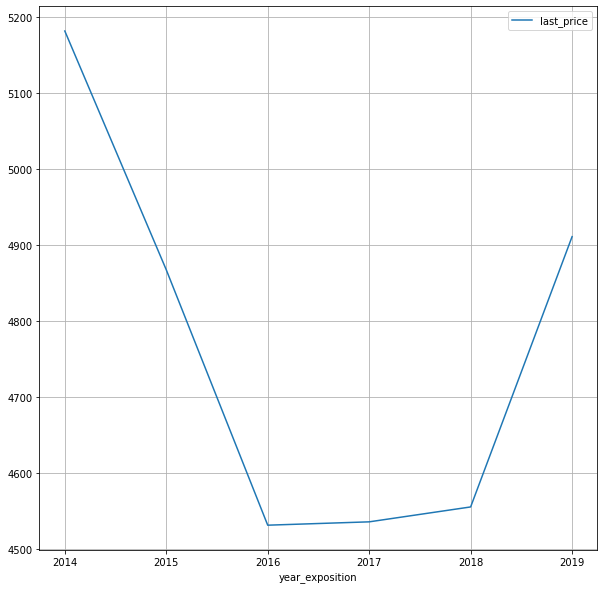

In [ ]:
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, figsize=(10, 10));

In [ ]:
display(data['year_exposition'].corr(data['last_price'])) 

0.017659793150907828

Коэффициент корреляции Пирсона показывает нам, что год публикации практически не взаимосвязан со стоимостью объекта.Однако, предполагаю, что связь в данном случае очень тонкая и корреляция Пирсона ее не берет. Стоимость квартир из года в год может меняться из-за множества количества факторов, таких как: уровень инфляции, баланс спроса / предложения, улучшения инфраструктуры и пр. Т.е, события, происходящие из года в год, могут повлиять на стоимость объекта. 

##### Короткий вывод

Исходя из полученных данны, больше всего на общую стоимость объекта влияют:
- общая площать (коэффициент корреляции 0.6587169725802491)
- жилая площадь (коэффициент корреляции 0.5453839691034181)
- площадь кухни (коэффициент корреляции 0.4762170904935123)
- количество комнат (коэффициент корреляции 0.4097508734753711)

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

##### Определяем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
#группируем названию населенного пункта и находим среднюю цену и количество объектов
top10 = data.groupby('locality_name').agg({'price_m2':['mean', 'count']}) 
#переименовываем столбцы
top10.columns = ['price_m', 'count'] 
#сортируем столбцы и выводим первые 10
top10.sort_values(by='count', ascending=False).head(10)

,price_m,count
locality_name,,
Санкт-Петербург,104.664935,12540
Мурино,85.981133,547
Кудрово,95.435944,429
Шушары,78.574447,425
Всеволожск,66.813333,372
Колпино,75.277699,326
Пушкин,99.793429,315
Парголово,90.827949,312
Гатчина,68.421818,297


##### Определяем населенные пункты с самой и самой низкой ценой за м2

In [ ]:
#сотритуем по стоимости
top10.sort_values(by='price_m', ascending=False) 

,price_m,count
locality_name,,
Санкт-Петербург,104.664935,12540
Сестрорецк,100.723630,146
Лисий Нос,100.663333,3
Зеленогорск,100.122500,20
Пушкин,99.793429,315
...,...,...
Совхозный,12.630000,2
Выскатка,12.335000,2
Вахнова Кара,11.690000,1


Из полученных данных видим, что самая высокая цена м2 в Санкт-Петербурге, а самая низкая цена за м2 в Ставрополье

#### Вычислим среднюю цену каждого километра в СПб

Создадим таблицу с данными по городу СПб

In [ ]:
#создали таблицу с данными по городу СПб
data_spb = data.query('locality_name == "Санкт-Петербург"')
#округляем для верногоопределения км от центра
data_spb['city_centers_nearest_km'] = round(data_spb['city_centers_nearest_km']) 

/tmp/ipykernel_100/3270614724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['city_centers_nearest_km'] = round(data_spb['city_centers_nearest_km'])


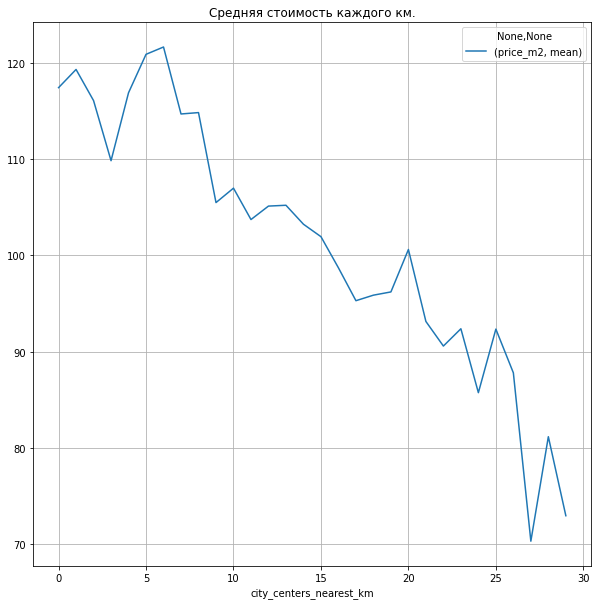

In [ ]:
#выявляем стоимость каждого км.
data_spb.groupby('city_centers_nearest_km').agg({'price_m2':['mean']})\
    .plot(grid=True, figsize=(10, 10), title = 'Средняя стоимость каждого км.');

In [ ]:
display(data['city_centers_nearest_km'].corr(data['price_m2']))

-0.40332897324743056

Краткий вывод:
- Наблюдаем обратную зависимость - чем дальше от центра города, тем ниже стоимость м2. 
- Коэффициент Пирсона составляет -0.4029460417191881

### Общий вывод

#### Качество полученных данных

В процессе обработки данных столкнулись с проблемами, которые можно попытаться исключить. А именно:
- проблемы, которые могли возникнуть из-за человеческого фактора. К таким можно отнести пропуски в данных (например, незаполненная площадь кухни, жилая площадь, высота потолков, общая этажность дома и пр.), некорректно ввеленное название населенного пункта и пр. Чтобы исключить подобные ошибки, по нашему мнению, необходимо проработать интерфейс добавления объекта пользователем: добавить подсказки, разъяснения, проверку занчений (например, если в потолок вписывают высоту больше 10м, показать всплывашку-предупреждение "Редкая высота потолков", например, и пр.)
- проблемы, которые могут возникнуть по техническим причинам. Например, отсутствует расстояние до аэропорта, от центра города и пр. Для того, чтобы их исправить, необходимо разработать ТЗ, в котором указать фактические и желаемые результаты.

#### Какие факторы влияют на стоимость квартиры

Необходимо выработать четкую методологию распределения населенных пунктов по группам, чтобы определить корректную корреляцию (об этом говорим в п.4.3.2).

Если опираться на общие обработанные данные по всем городам, больше всего на общую стоимость объекта влияют:
- общая площать (коэффициент корреляции 0.6587169725802491)
- жилая площадь (коэффициент корреляции 0.5453839691034181)
- площадь кухни (коэффициент корреляции 0.4762170904935123)
- количество комнат (коэффициент корреляции 0.4097508734753711)
- стоимость м2 в СПб по удаленности от центра (коэффициент корреляции -0.4029460417191881)

Однако, при выборе конкретного города корреляция меняется, например:
- Коэффициент корреляции общей площади и стоиомсти по всему датасету равен 0.6587169725802491
- Коэффициент корреляции общей площади объектов СПБ и стоимости равен 0.7777215577279287
Поэтому необходимо выработать четкую методологию распределения населенных пунктов по группам для выявления более точного коэффициента.



#### На что обратить внимание

На стоимость квартиры могут повлиять внешние факторы, например, связанные со стоимостью цен на стройматериалы, санкции и пр. Эти факторы сложно спрогнозировать, но их нужно иметь ввиду. Из-за этих факторов стоимость квартир может расти из года в год. Но при этом, коэффициент корреляция Пирсона показывает слабую взяимосвязь года и роста цен на квартиры (0.017659793150907828)

Так же необходимо обратить внимание на аномалию из пункта 4.3, так как выбиваются некоторые значения - необычно много продаж квартир, примерно, на 45 и 60 день.